<a href="https://colab.research.google.com/github/santiagofloresm/ENEL645-Team25-FinalProject/blob/dev/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project
## Team 25
Santiago Flores - 30119885

Davis Allan - 10016543

Jordan Joorisity - 30117950

Patrick Pickard - 30116807

Joshua Posyluzny - 30118206

# 1. Loading and pre-processing the dataset

### 1.1 Clone the repository

In [1]:
!git clone -b dev https://github.com/santiagofloresm/ENEL645-Team25-FinalProject.git

Cloning into 'ENEL645-Team25-FinalProject'...
remote: Enumerating objects: 127, done.
remote: Counting objects: 100% (127/127), done.
remote: Compressing objects: 100% (116/116), done.
remote: Total 156987 (delta 62), reused 31 (delta 9), pack-reused 156860
Receiving objects: 100% (156987/156987), 2.87 GiB | 45.38 MiB/s, done.
Resolving deltas: 100% (253/253), done.
Checking out files: 100% (168586/168586), done.


### 1.2 Define the paths

In [2]:
train_folder = 'ENEL645-Team25-FinalProject/Dataset/Train'
test_folder = 'ENEL645-Team25-FinalProject/Dataset/Test'
validation_folder = 'ENEL645-Team25-FinalProject/Dataset/Validation'
test_alternative_folder = 'ENEL645-Team25-FinalProject/Dataset/Alternative_Test'

phase2_data_train_folder = 'ENEL645-Team25-FinalProject/New_Dataset/Train'

### 1.3 Original Dataset display

There are 29 classes in the original Kaggle dataset, one for each letter in the English alphabet, one for space, one for delete and a blank one. Below is an exmaple of each one.

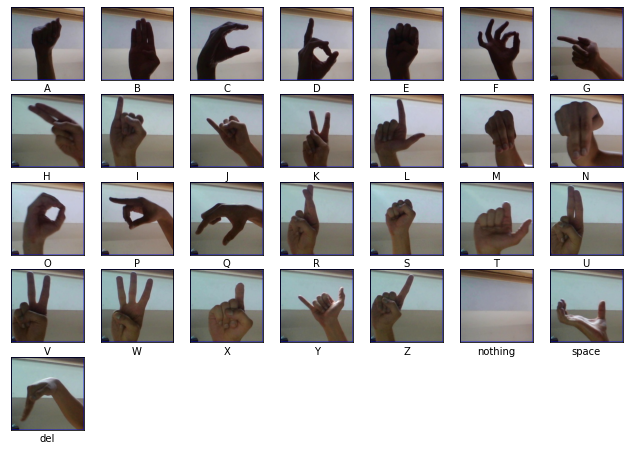

In [ ]:
import matplotlib.pyplot as plt

classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 
           'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 
           'W', 'X', 'Y', 'Z', 'nothing', 'space', 'del']

plt.figure(figsize=(11,11))
for i in range (0,29):
  plt.subplot(7,7, i+1)
  plt.xticks([])
  plt.yticks([])
  path = train_folder + "/" + classes[i] + "/" + classes[i] + "1.jpg"
  img = plt.imread(path)
  plt.imshow(img)
  plt.xlabel(classes[i])

### 1.4 New Dataset for Phase 2 Analysis

A second dataset was found, from kaggle, after the midterm milestone. The original training dataset caused the CNN model to overfit and perform poorly on the alternative testing dataset. To correct this, a new datset was implemented for training and validation.

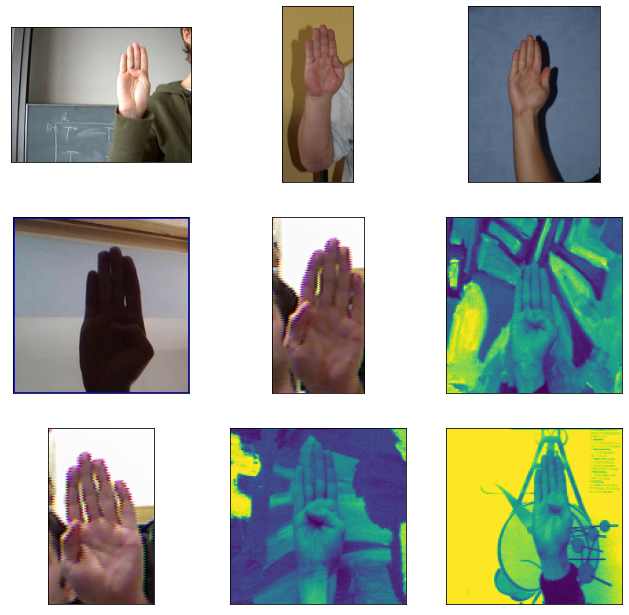

In [19]:
import matplotlib.pyplot as plt

fileNames = ['B', 'B_P_hgr1_id01_', 'B_P_hgr1_id09_', 'B1', 'color_1_051', 'mpoetzb', 'color_1_013', 'tmaureb', 'orehseb']

plt.figure(figsize=(11,11))
for i in range (0,9):
  plt.subplot(3,3, i+1)
  plt.xticks([])
  plt.yticks([])
  if (i < 4):
    path = phase2_data_train_folder + "/B/" + fileNames[i] + "3.jpg"
  else:
    path = phase2_data_train_folder + "/B/" + fileNames[i] + "3.png"
  img = plt.imread(path)
  plt.imshow(img)

Unfortunately, all attempts to train off this dataset immediately resulted in overfitting, regardless of the type of model. Transfer learning and our CNN model all started to overfit immediately, with a steadily increasing validation loss.

This is believed to be a result of the variation in image format. Some images are actually grayscale. For others, the aspect ratios and size of the images vary significantly. Attempts were made to force square and rectangular input image shapes, but this did not improve the results. Gradient clipping and additional dropouts were also added to the models, but this also had little impact on preventing overfitting.

As such, the original dataset was reverted back to, for training and testing on the models going forward.

### 1.5 Data import and augmentation

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

image_input_dimensions_3d = (128,128,3)
image_input_dimensions_2d = (128,128)
batch_size = 32
seed = 32

#### 1.5.1 Training data

In [ ]:
# https://keras.io/api/preprocessing/image/
# categorical class_mode will be 2D one-hot encoded labels
# The dictionary containing the mapping from class names to class indices can be obtained via the attribute class_indices
train_data_gen = ImageDataGenerator(brightness_range=[0.5, 1.5], 
                                    width_shift_range=0.1, 
                                    height_shift_range=0.1, 
                                    rotation_range=20, 
                                    horizontal_flip=True, 
                                    rescale=1./255)

train_generator = train_data_gen.flow_from_directory(train_folder, 
                                                     batch_size=batch_size, 
                                                     seed=seed, 
                                                     target_size=image_input_dimensions_2d, 
                                                     class_mode="categorical")

Found 69600 images belonging to 29 classes.


In [ ]:
train_generator.class_indices

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25,
 'del': 26,
 'nothing': 27,
 'space': 28}

### Training image analysis

In [ ]:
  h, w, r = train_generator.image_shape
  print('There are', train_generator.samples, 'images for training the model')
  print(train_generator.samples/train_generator.num_classes, 'images per category')
  print('The shape of each image is', train_generator.image_shape)
  print('From which:')
  print('The width is', w)
  print('The height is', h)
  print('And each pixel has a value for each component of RGB for a total of', r)

There are 69600 images for training the model
2400.0 images per category
The shape of each image is (128, 128, 3)
From which:
The width is 128
The height is 128
And each pixel has a value for each component of RGB for a total of 3


#### 1.5.2 Test data

In [ ]:
test_data_gen = ImageDataGenerator(rescale=1./255)

test_generator = test_data_gen.flow_from_directory(test_folder, 
                                                   batch_size=batch_size, 
                                                   seed=seed, 
                                                   target_size=image_input_dimensions_2d, 
                                                   class_mode="categorical")

Found 8700 images belonging to 29 classes.


#### 1.5.2,1 Alternative Test data

In [ ]:
alternative_test_data_gen = ImageDataGenerator(rescale=1./255)

alternative_test_generator = test_data_gen.flow_from_directory(test_alternative_folder, 
                                                   batch_size=batch_size, 
                                                   seed=seed, 
                                                   target_size=image_input_dimensions_2d, 
                                                   class_mode="categorical")

Found 870 images belonging to 29 classes.


#### 1.5.3 Validation data

In [ ]:
# this will simply scale the validation image set the same way as the test and train is done, encode the data to 'categorical' (one_hot_encoder equivalent) and store it in an identical object type
val_data_gen = ImageDataGenerator(rescale=1./255)

val_generator = val_data_gen.flow_from_directory(validation_folder, 
                                                 batch_size=batch_size, 
                                                 seed=seed, 
                                                 target_size=image_input_dimensions_2d, 
                                                 class_mode="categorical")

Found 8700 images belonging to 29 classes.


### 1.6 Train test split

In [ ]:
print('After the split there are:')
print(train_generator.samples, 'images on the train split')
print(test_generator.samples, 'images on the test split')
print(alternative_test_generator.samples, 'images on the alternative test split')
print(val_generator.samples, 'images on the validation split')
print('For each category 80% of the images are in the train split, 10% in the test split and 10% in the validation split')

After the split there are:
69600 images on the train split
8700 images on the test split
870 images on the alternative test split
8700 images on the validation split
For each category 80% of the images are in the train split, 10% in the test split and 10% in the validation split


# 2. Convolutional Neural Network Model



### 2.1 Tensorflow Import

In [ ]:
import tensorflow as tf

### 2.2 CNN Model Definition

Jordan's model

In [ ]:
def cnn_asl_model(ishape = image_input_dimensions_3d, k = 29, lr = 1e-4):

  model_input = tf.keras.layers.Input(shape = ishape)

  l1 = tf.keras.layers.Conv2D(32, (3,3), padding = 'same', activation = 'relu')(model_input)
  l1_1 = tf.keras.layers.Conv2D(32, (3,3), padding = 'same', activation = 'relu')(l1)
  l1_maxpool = tf.keras.layers.MaxPool2D((2,2))(l1_1)

  l2 = tf.keras.layers.Conv2D(64, (3,3), padding = 'same', activation = 'relu')(l1_maxpool)
  l2_1 = tf.keras.layers.Conv2D(64, (3,3), padding = 'same', activation = 'relu')(l2)
  l2_maxpool = tf.keras.layers.MaxPool2D((2,2))(l2_1)

  l3 = tf.keras.layers.Conv2D(128, (3,3), padding = 'same', activation = 'relu')(l2_maxpool)
  l3_1 = tf.keras.layers.Conv2D(128, (3,3), padding = 'same', activation = 'relu')(l3)
  l3_maxpool = tf.keras.layers.MaxPool2D((2,2))(l3_1)

  l4 = tf.keras.layers.Conv2D(256, (3,3), padding = 'same', activation = 'relu')(l3_maxpool)
  l4_1 = tf.keras.layers.Conv2D(256, (3,3), padding = 'same', activation = 'relu')(l4)
  l4_maxpool = tf.keras.layers.MaxPool2D((2,2))(l4_1)

  flat = tf.keras.layers.Flatten()(l4_maxpool)
  flat_drop = tf.keras.layers.Dropout(0.5)(flat)
  out = tf.keras.layers.Dense(k, activation = 'softmax')(flat_drop)

  model = tf.keras.models.Model(inputs = model_input, outputs = out)
  model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = lr), loss = 'categorical_crossentropy', metrics = ['accuracy'])
  return model

Original model

In [ ]:
# def cnn_asl_model(ishape = image_input_dimensions_3d, k = 29, lr = 1e-4):

#   model_input = tf.keras.layers.Input(shape = ishape)

#   l1 = tf.keras.layers.Conv2D(32, (3,3), padding = 'same', activity_regularizer = 'l2', activation = 'relu')(model_input)
#   l1_maxpool = tf.keras.layers.MaxPool2D((2,2))(l1_drop)

#   l2 = tf.keras.layers.Conv2D(64, (3,3), padding = 'same', activity_regularizer = 'l2', activation = 'relu')(l1_maxpool)
#   l2_maxpool = tf.keras.layers.MaxPool2D((2,2))(l2_drop)

#   l3 = tf.keras.layers.Conv2D(128, (3,3), padding = 'same', activity_regularizer = 'l2', activation = 'relu')(l2_maxpool)
#   l3_maxpool = tf.keras.layers.MaxPool2D((2,2))(l3_drop)

#   l4 = tf.keras.layers.Conv2D(256, (3,3), padding = 'same', activity_regularizer = 'l2',  activation = 'relu')(l3_maxpool)
#   l4_maxpool = tf.keras.layers.MaxPool2D((2,2))(l4_drop)

#   flat = tf.keras.layers.Flatten()(l4_maxpool)
#   out = tf.keras.layers.Dense(k, activation = 'softmax')(flat)
#   out_drop = tf.keras.layers.Dropout(0.65)(out)

#   model = tf.keras.models.Model(inputs = model_input, outputs = out)
#   model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = lr), loss = 'categorical_crossentropy', metrics = ['accuracy'])
#   return model

### 2.3 Model Summary

In [ ]:
model = cnn_asl_model()
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0     

### 2.4 Model Callbacks

In [ ]:
model_name = "best_model_asl_cnn.h5"
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

monitor = tf.keras.callbacks.ModelCheckpoint(model_name, monitor = 'val_loss', verbose = 0, save_best_only = True, save_weights_only = True, mode = 'min')

def scheduler(epoch, lr):
  if epoch%10 == 0:
    lr = lr/2
  return lr

lr_schedule = tf.keras.callbacks.LearningRateScheduler(scheduler, verbose=0)

### 2.5 Model training

In [ ]:
# fit the model on the augmented dataset
history = model.fit(train_generator, steps_per_epoch=69600/batch_size, 
          epochs = 50 , verbose = 1, 
          callbacks = [early_stop, monitor, lr_schedule], 
          validation_data=val_generator, validation_steps=8700/batch_size)

Epoch 1/50
2175/2175 [==============================] - 433s 183ms/step - loss: 3.0423 - accuracy: 0.1302 - val_loss: 1.4571 - val_accuracy: 0.5576
Epoch 2/50
2175/2175 [==============================] - 394s 181ms/step - loss: 1.6315 - accuracy: 0.5008 - val_loss: 0.6129 - val_accuracy: 0.8444
Epoch 3/50
2175/2175 [==============================] - 396s 182ms/step - loss: 1.0037 - accuracy: 0.6852 - val_loss: 0.3372 - val_accuracy: 0.9089
Epoch 4/50
2175/2175 [==============================] - 394s 181ms/step - loss: 0.6840 - accuracy: 0.7810 - val_loss: 0.2018 - val_accuracy: 0.9491
Epoch 5/50
2175/2175 [==============================] - 393s 181ms/step - loss: 0.5048 - accuracy: 0.8365 - val_loss: 0.1411 - val_accuracy: 0.9633
Epoch 6/50
2175/2175 [==============================] - 393s 181ms/step - loss: 0.3857 - accuracy: 0.8763 - val_loss: 0.0927 - val_accuracy: 0.9757
Epoch 7/50
2175/2175 [==============================] - 393s 181ms/step - loss: 0.3018 - accuracy: 0.9026 - val_

Saving model training history

In [ ]:
import numpy as np

In [ ]:
# saving training history to a numpy file
np.save('model_history.npy',history.history)

Loading model training history

In [ ]:
# loading the training history from numpy file, only need to run if we have to access history again
training_history = np.load('/content/ENEL645-Team25-FinalProject/Model Training History/model_history.npy',allow_pickle='TRUE').item()

# 3 Testing the model and extracting relevant metrics

In [ ]:
best_model_weights_path = "/content/ENEL645-Team25-FinalProject/Best Model Weights/best_model_asl_cnn.h5"

### 3.1 Accuracy and training history plots

In [ ]:
model.load_weights(best_model_weights_path)
metrics = model.evaluate(test_generator)
print("Categorical cross-entropy:", round(metrics[0], 3))
print("Accuracy:", round(metrics[1]*100, 2),'%')

272/272 [==============================] - 15s 42ms/step - loss: 0.0023 - accuracy: 0.9998
Categorical cross-entropy: 0.003
Accuracy: 99.93 %


In [ ]:
metrics = model.evaluate(alternative_test_generator)
print("This is the alternative dataset we found, and shows that this model (in its current state), does not generalize well at all.")
print("Categorical cross-entropy:", round(metrics[0], 3))
print("Accuracy:", round(metrics[1]*100, 2),'%')

28/28 [==============================] - 1s 49ms/step - loss: 15.1862 - accuracy: 0.3184
This is the alternative dataset we found, and shows that this model (in its current state), does not generalize well at all.
Categorical cross-entropy: 15.186
Accuracy: 31.84 %


Test loss (cross-entropy and accuracy): [0.0032438505440950394, 0.9993103742599487]



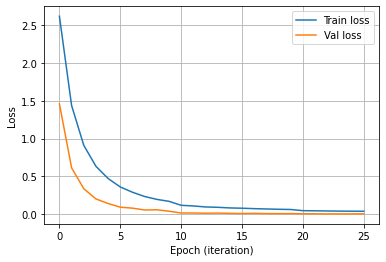

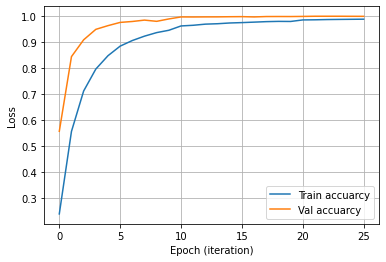

In [ ]:
loss = model.evaluate(test_generator, verbose=0)
print('Test loss (cross-entropy and accuracy):',loss)
print()

plt.plot(training_history['loss'], label = "Train loss")
plt.plot(training_history['val_loss'], label = "Val loss")
plt.xlabel("Epoch (iteration)")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()


plt.plot(training_history['accuracy'], label = "Train accuarcy")
plt.plot(training_history['val_accuracy'], label = "Val accuarcy")
plt.xlabel("Epoch (iteration)")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

### 3.2 Classification Report & Confusion Matrix

#### 3.2.1 Function definitions

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import itertools

In [ ]:
# code was acquired from https://www.kaggle.com/danrasband/classifying-images-of-the-asl-alphabet-using-keras

def plot_confusion_matrix(cm, classes,
                      normalize=False,
                      title='Confusion matrix',
                      cmap=plt.cm.Blues):
  
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return


def plot_confusion_matrix_with_default_options(y_pred, y_true, classes):
    '''Plot a confusion matrix heatmap with a default size and default options.'''
    cm = confusion_matrix(y_true, y_pred)
    with sns.axes_style('ticks'):
        plt.figure(figsize=(12, 12))
        plot_confusion_matrix(cm, classes)
        plt.show()
    return

#### 3.2.2 Resetting the test generators and setting shuffle to False

In [ ]:
test_generator.reset()
test_generator = test_data_gen.flow_from_directory(test_folder, 
                                                   batch_size=batch_size, 
                                                   seed=seed, 
                                                   target_size=image_input_dimensions_2d, 
                                                   class_mode="categorical",
                                                   shuffle=False)

alternative_test_generator.reset()
alternative_test_generator = test_data_gen.flow_from_directory(test_alternative_folder, 
                                                   batch_size=batch_size, 
                                                   seed=seed, 
                                                   target_size=image_input_dimensions_2d, 
                                                   class_mode="categorical",
                                                   shuffle=False)

Found 8700 images belonging to 29 classes.
Found 870 images belonging to 29 classes.


#### 3.2.3 Classification report and confusion matrix for original test data

In [ ]:
predictions = model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

report = classification_report(y_true, y_pred, target_names=class_labels)
print(report)

              precision    recall  f1-score   support

           A       1.00      1.00      1.00       300
           B       1.00      1.00      1.00       300
           C       1.00      1.00      1.00       300
           D       1.00      1.00      1.00       300
           E       1.00      1.00      1.00       300
           F       1.00      1.00      1.00       300
           G       1.00      1.00      1.00       300
           H       1.00      1.00      1.00       300
           I       1.00      1.00      1.00       300
           J       1.00      1.00      1.00       300
           K       1.00      1.00      1.00       300
           L       1.00      1.00      1.00       300
           M       1.00      1.00      1.00       300
           N       1.00      1.00      1.00       300
           O       1.00      1.00      1.00       300
           P       1.00      1.00      1.00       300
           Q       1.00      1.00      1.00       300
           R       1.00    

Confusion matrix, without normalization


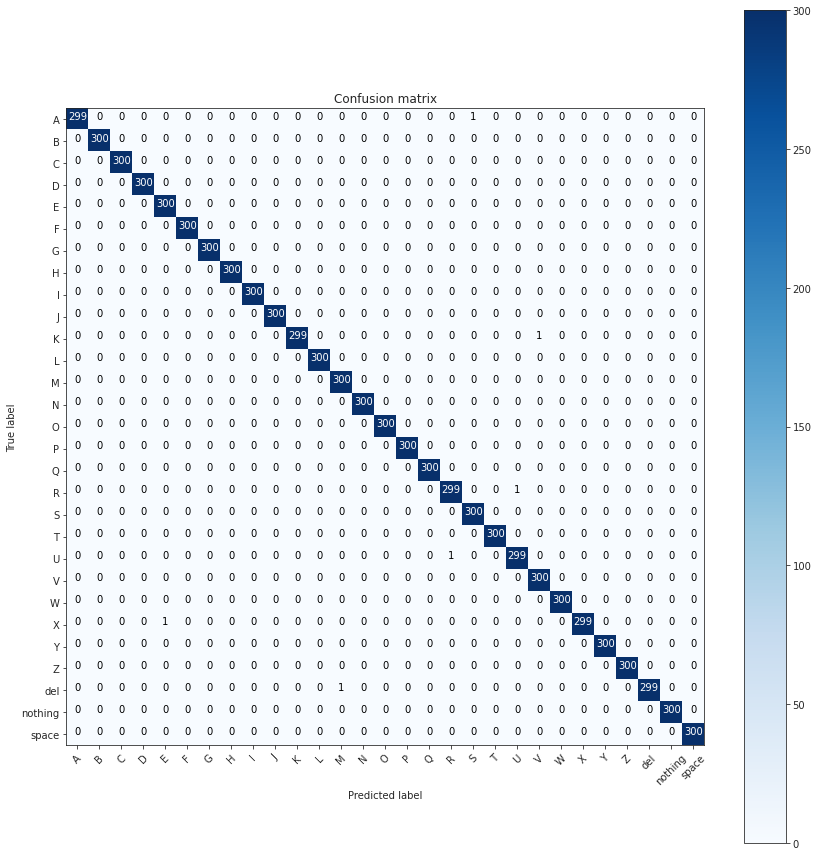

In [ ]:
plot_confusion_matrix_with_default_options(y_pred, y_true, class_labels)

Classification report and confusion matrix for alternate test data

In [ ]:
predictions_alternate_test = model.predict(alternative_test_generator)
y_pred_alternate = np.argmax(predictions_alternate_test, axis=1)
y_true_alternate = alternative_test_generator.classes

report_alternate = classification_report(y_true_alternate, y_pred_alternate, target_names=class_labels)
print(report_alternate)

              precision    recall  f1-score   support

           A       0.00      0.00      0.00        30
           B       0.33      0.03      0.06        30
           C       1.00      0.07      0.12        30
           D       0.83      0.17      0.28        30
           E       0.18      0.07      0.10        30
           F       0.36      0.83      0.51        30
           G       0.20      0.57      0.30        30
           H       0.75      0.50      0.60        30
           I       0.10      0.03      0.05        30
           J       0.30      0.67      0.42        30
           K       0.38      0.37      0.37        30
           L       0.47      0.50      0.48        30
           M       0.09      0.30      0.14        30
           N       0.10      0.40      0.16        30
           O       0.69      0.30      0.42        30
           P       0.37      0.90      0.52        30
           Q       0.44      0.27      0.33        30
           R       0.44    

Confusion matrix, without normalization


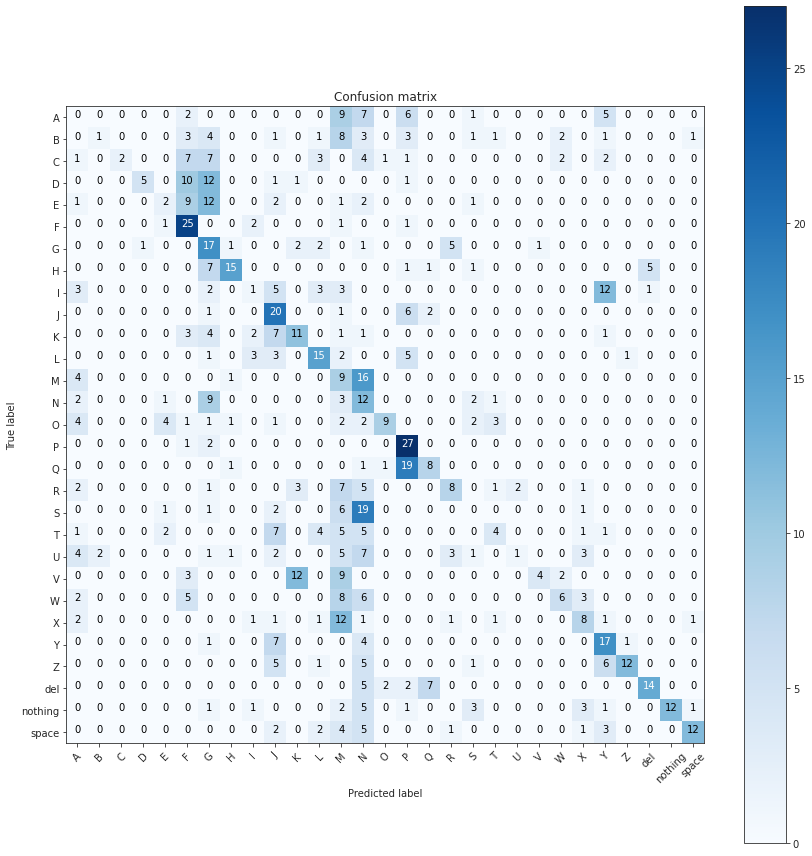

In [ ]:
plot_confusion_matrix_with_default_options(y_pred_alternate, y_true_alternate, class_labels)